In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

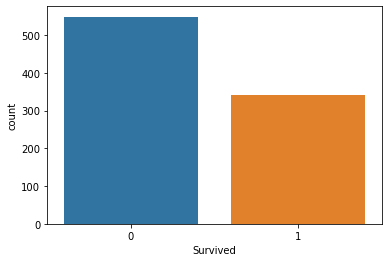

In [11]:
sns.countplot(x='Survived',data=df)

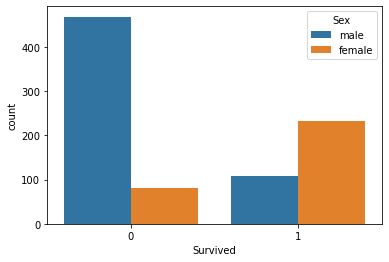

In [12]:
sns.countplot(x='Survived',data=df,hue='Sex')

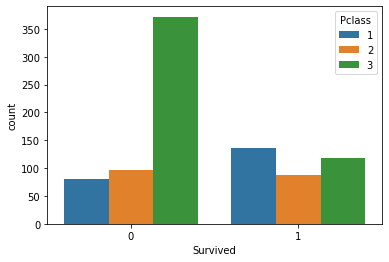

In [13]:
sns.countplot(x='Survived',data=df,hue='Pclass')

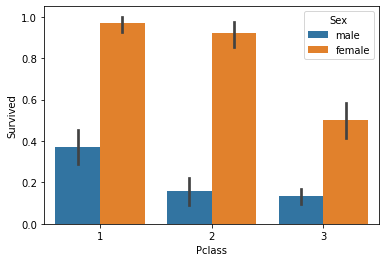

In [14]:
sns.barplot(x='Pclass',y='Survived',data=df,hue='Sex')

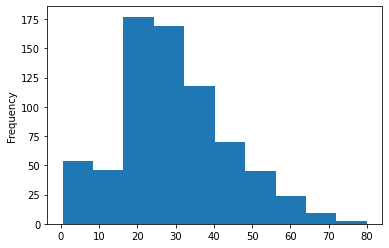

In [15]:
df['Age'].plot.hist()
#it shows more middle age people are travelling on titanic

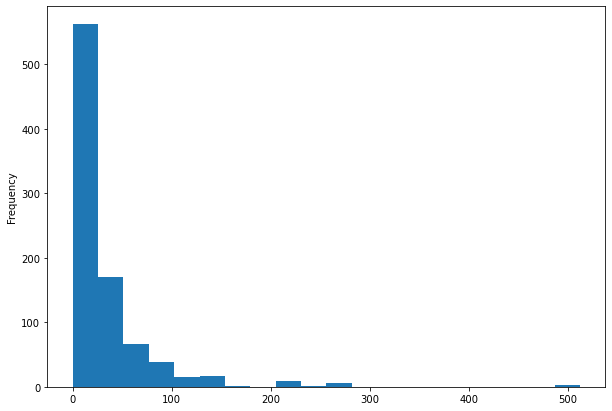

In [16]:
df['Fare'].plot.hist(bins=20,figsize=(10,7))

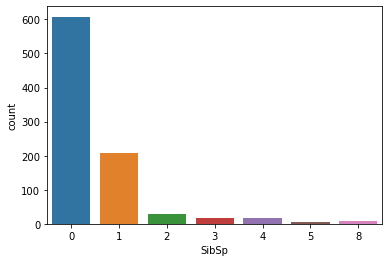

In [17]:
sns.countplot(x='SibSp',data=df)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

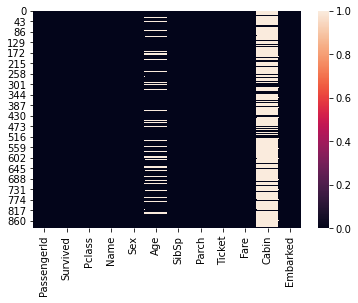

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.drop('Cabin',axis=1,inplace=True)

In [21]:
#sklearn.impute SimpleImputer works forimputing null values in object or categorical data 

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))


In [22]:
im=SimpleImputer(strategy='mean')
df['Age']=im.fit_transform(df['Age'].values.reshape(-1,1))

In [23]:
# we change sex & embarked column to numerical format by using label encoder from sklearn

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list=['Sex','Embarked']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [24]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [25]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(891, 8)
(820, 8)


In [26]:
x=df_new.iloc[:,1:]
x.shape

(820, 7)

In [27]:
y=pd.DataFrame(df_new['Survived'])
y.shape

(820, 1)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [29]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (656, 7)
x_test_shape: (164, 7)
y_train_shape: (656, 1)
y_test_shape: (164, 1)


In [30]:
#LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy_score: 0.8292682926829268
[[91 13]
 [15 45]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.78      0.75      0.76        60

    accuracy                           0.83       164
   macro avg       0.82      0.81      0.81       164
weighted avg       0.83      0.83      0.83       164



In [31]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'entropy'}


In [32]:
#decisiontreeclassifier

dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

accuracy_score: 0.8109756097560976


[[91 13]
 [18 42]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.76      0.70      0.73        60

    accuracy                           0.81       164
   macro avg       0.80      0.79      0.79       164
weighted avg       0.81      0.81      0.81       164



In [33]:
#gridsearchcv
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [34]:
#svc

svc=SVC(kernel='linear',C=1)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predsvc))
print('\n')
print(confusion_matrix(y_test,predsvc))
print('\n')
print(classification_report(y_test,predsvc))

accuracy_score: 0.823170731707317


[[92 12]
 [17 43]]


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.78      0.72      0.75        60

    accuracy                           0.82       164
   macro avg       0.81      0.80      0.81       164
weighted avg       0.82      0.82      0.82       164



In [35]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

accuracy_score: 0.7378048780487805


[[88 16]
 [27 33]]


              precision    recall  f1-score   support

           0       0.77      0.85      0.80       104
           1       0.67      0.55      0.61        60

    accuracy                           0.74       164
   macro avg       0.72      0.70      0.70       164
weighted avg       0.73      0.74      0.73       164



In [36]:
gnb=GaussianNB()
from sklearn.model_selection import cross_val_score
cross_val_score(gnb,x,y,cv=5).mean()



0.7695121951219512

In [37]:

gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print(confusion_matrix(y_test,predgnb))
print('\n')
print(classification_report(y_test,predgnb))

accuracy_score: 0.8048780487804879


[[88 16]
 [16 44]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.73      0.73      0.73        60

    accuracy                           0.80       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.80      0.80      0.80       164



In [38]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=42)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,labels=[0,1]))

0.8292682926829268
[[93 11]
 [17 43]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.80      0.72      0.75        60

    accuracy                           0.83       164
   macro avg       0.82      0.81      0.81       164
weighted avg       0.83      0.83      0.83       164



In [39]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8292682926829268
[[90 14]
 [14 46]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       104
           1       0.77      0.77      0.77        60

    accuracy                           0.83       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.83      0.83       164



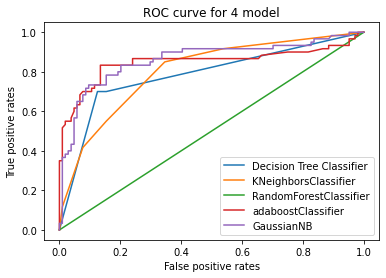

DTC AUC SCORE 0.7831730769230769
KNN auc score 0.8024839743589743
Random forest classifier 0.8724358974358974
Adaboost classifier 0.848477564102564
Gaussian NB 0.8606570512820513


In [43]:
dtcpred_prob=dtc.predict_proba(x_test)[:,1]
knnpred_prob=knn.predict_proba(x_test)[:,1]
rfpred_prob=rf.predict_proba(x_test)[:,1]
adpred_prob=ad.predict_proba(x_test)[:,1]
gnbpred_prob=gnb.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
dtc_tpr,dtc_fpr,dtc_thresholds=roc_curve(y_test,dtcpred_prob)
knn_tpr,knn_fpr,knn_thresholds=roc_curve(y_test,knnpred_prob)
rf_tpr,rf_fpr,rf_threshold=roc_curve(y_test,rfpred_prob)
ad_tpr,ad_fpr,ad_threshold=roc_curve(y_test,adpred_prob)
gnb_tpr,gnb_fpr,gnb_threshold=roc_curve(y_test,gnbpred_prob)

plt.plot(dtc_tpr,dtc_fpr,label ='Decision Tree Classifier')
plt.plot(knn_tpr,knn_fpr,label='KNeighborsClassifier')
plt.plot(rf_tpr,rf_tpr,label='RandomForestClassifier')
plt.plot(ad_tpr,ad_fpr,label='adaboostClassifier')
plt.plot(gnb_tpr,gnb_fpr,label='GaussianNB')


plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve for 4 model')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('KNN auc score',roc_auc_score(y_test,knnpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfpred_prob))
print('Adaboost classifier',roc_auc_score(y_test,adpred_prob))
print('Gaussian NB',roc_auc_score(y_test,gnbpred_prob))